In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

# Importing the data

In [2]:
data = pd.read_pickle('Data.pickle')

irradiance = data.Irradiance
T_amb = data.Air_temperature
wind_speed = data.Wind_speed
T_water = data.Water_temperature

# Using the Faiman model

In [35]:
def calculate_temperature_Faiman(irradiance, T_amb, U0, U1, efficiency, wind_speed, alpha=0.9):
    
    T_mod = T_amb + (irradiance*(alpha - efficiency))/(U0 + U1*wind_speed)
    
    return T_mod

In [36]:
# Defining the needed parameters for use in model

efficiency = 0.1697  # From module datasheet

U0 = 15.8
U1 = 7.0

In [37]:
T_mod_predicted_Faiman = calculate_temperature_Faiman(irradiance, T_amb, U0, U1, efficiency, wind_speed)

In [38]:
# Calculating the mse and R^2 for the Faiman model results

mse = mean_squared_error(data.Module_temperature, T_mod_predicted_Faiman)
r2 = r2_score(data.Module_temperature, T_mod_predicted_Faiman)

print(f"Mean Squared Error full dataset: {mse}")
print(f"R-squared full dataset: {r2}")

Mean Squared Error full dataset: 10.5654088117263
R-squared full dataset: 0.9434549368119752


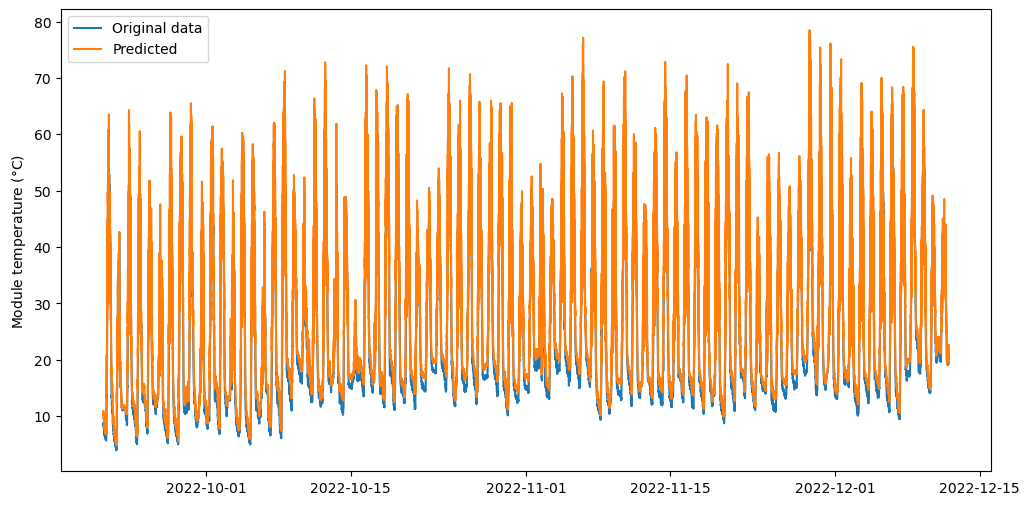

In [39]:
# Plotting predicted vs actual results

plt.figure(figsize=(12, 6))
plt.plot(data.index, data.Module_temperature, label="Original data")
plt.plot(T_mod_predicted_Faiman.index, T_mod_predicted_Faiman, label="Predicted")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Faiman_plot_of_predicted_and_original_data.png")
plt.show()

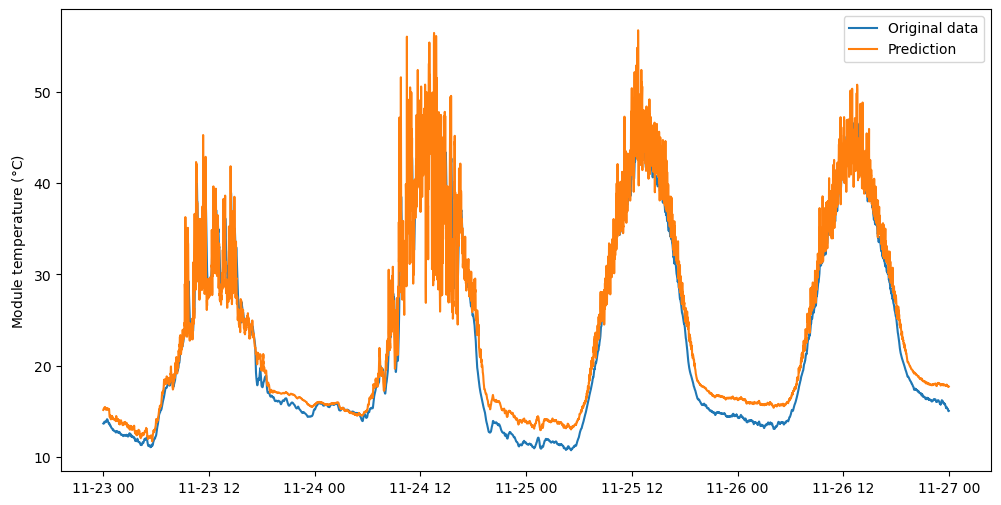

In [77]:
# Only plotting some days

plt.figure(figsize=(12, 6))
plt.plot(data.loc["2022-11-23":"2022-11-26"].index, 
         data.loc["2022-11-23":"2022-11-26", "Module_temperature"], 
         label="Original data")
plt.plot(T_mod_predicted_Faiman.loc["2022-11-23":"2022-11-26"].index, 
         T_mod_predicted_Faiman.loc["2022-11-23":"2022-11-26"], 
         label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Faiman_plot_of_predicted_and_original_data_some_days.png")
plt.show()

# Using the Sandia model

In [3]:
def calculate_temperature_Sandia(irradiance, T_amb, a, b, wind_speed):
    
    T_mod = irradiance*np.exp(a + b*wind_speed) + T_amb
    
    return T_mod

In [4]:
# Defining the needed parameters for use in model

a = -3.56
b = -0.075

In [5]:
T_mod_predicted_Sandia = calculate_temperature_Sandia(irradiance, T_amb, a, b, wind_speed)

In [6]:
# Calculating the mse and R^2 for the Sandia model results

mse = mean_squared_error(data.Module_temperature, T_mod_predicted_Sandia)
r2 = r2_score(data.Module_temperature, T_mod_predicted_Sandia)

print(f"Mean Squared Error full dataset: {mse}")
print(f"R-squared full dataset: {r2}")

Mean Squared Error full dataset: 8.598940855793598
R-squared full dataset: 0.9539792863006603


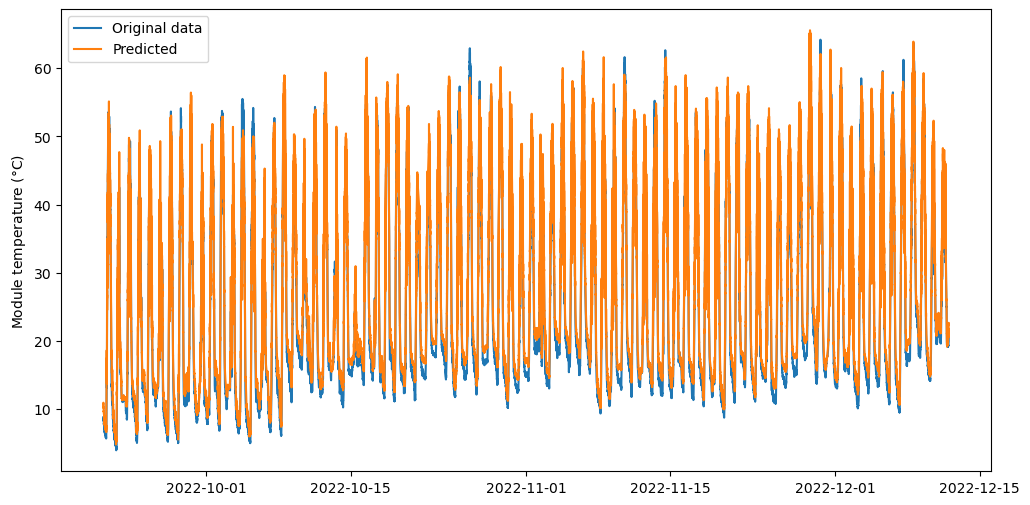

In [7]:
# Plotting predicted vs actual results

plt.figure(figsize=(12, 6))
plt.plot(data.index, data.Module_temperature, label="Original data")
plt.plot(T_mod_predicted_Sandia.index, T_mod_predicted_Sandia, label="Predicted")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Sandia_plot_of_predicted_and_original_data.png")
plt.show()

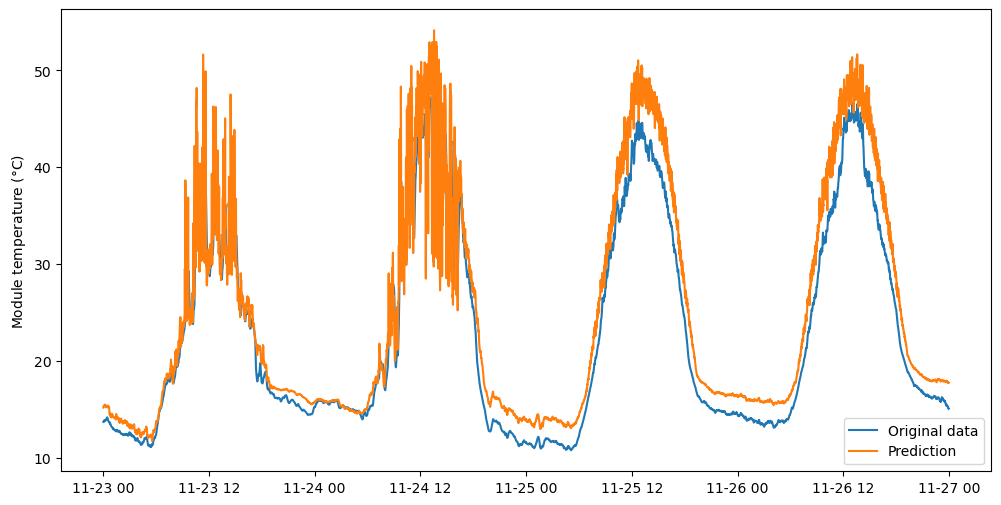

In [8]:
# Only plotting some days

plt.figure(figsize=(12, 6))
plt.plot(data.loc["2022-11-23":"2022-11-26"].index, 
         data.loc["2022-11-23":"2022-11-26", "Module_temperature"], 
         label="Original data")
plt.plot(T_mod_predicted_Sandia.loc["2022-11-23":"2022-11-26"].index, 
         T_mod_predicted_Sandia.loc["2022-11-23":"2022-11-26"], 
         label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Sandia_plot_of_predicted_and_original_data_some_days.png")
plt.show()

# Using linear models by Kamuyu et al.

## Model 2

In [14]:
def calculate_temperature_Kamuyu_v2(T_amb, irradiance, wind_speed, T_water):
    
    T_mod = 1.8081 + 0.9282*T_amb + 0.021*irradiance - 1.2210*wind_speed + 0.0246*T_water
    
    return T_mod

In [17]:
T_mod_predicted_Kamuyu2 = calculate_temperature_Kamuyu_v2(T_amb, irradiance, wind_speed, T_water)

In [18]:
# Calculating the mse and R^2

mse = mean_squared_error(data.Module_temperature, T_mod_predicted_Kamuyu2)
r2 = r2_score(data.Module_temperature, T_mod_predicted_Kamuyu2)

print(f"Mean Squared Error full dataset: {mse}")
print(f"R-squared full dataset: {r2}")

Mean Squared Error full dataset: 12.78197034832666
R-squared full dataset: 0.9315921102635026


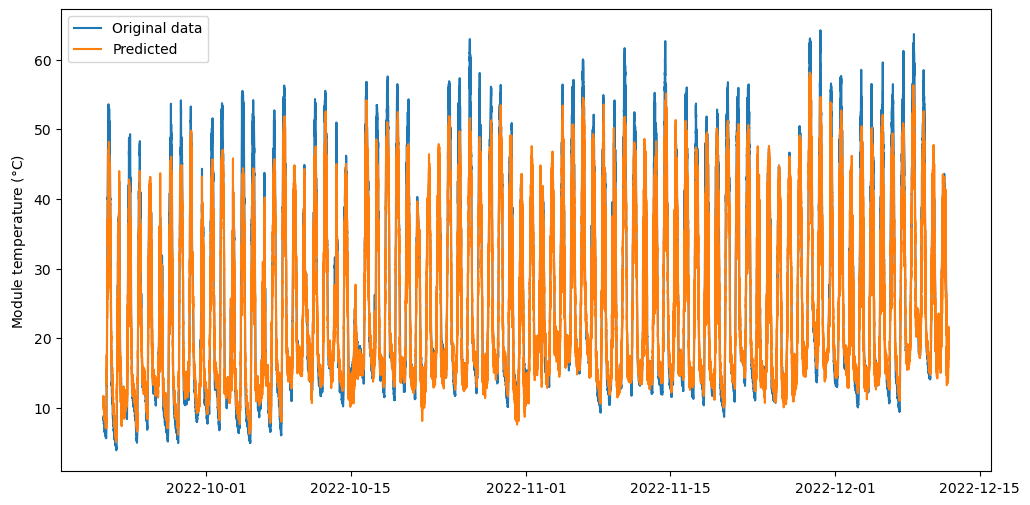

In [19]:
# Plotting predicted vs actual results

plt.figure(figsize=(12, 6))
plt.plot(data.index, data.Module_temperature, label="Original data")
plt.plot(T_mod_predicted_Kamuyu2.index, T_mod_predicted_Kamuyu2, label="Predicted")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Kamuyu2_plot_of_predicted_and_original_data.png")
plt.show()


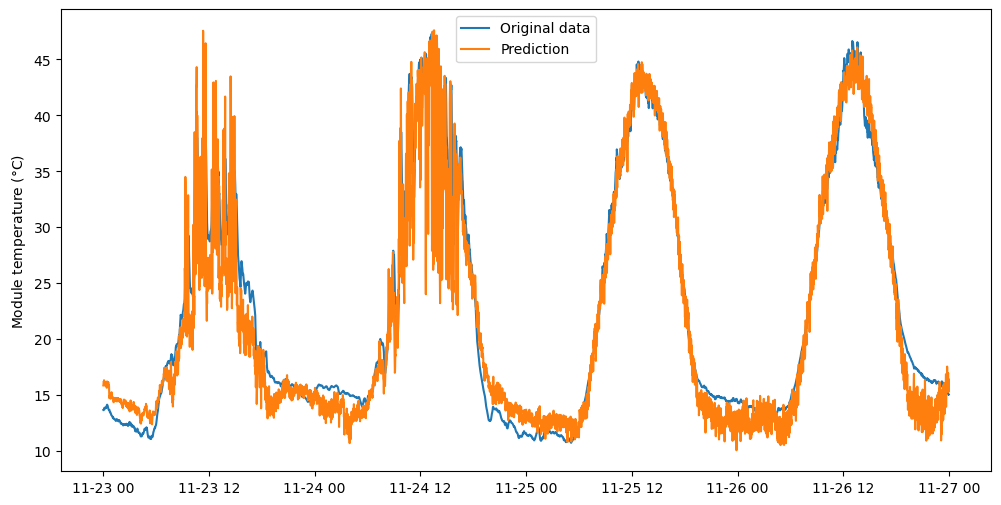

In [21]:
# Only plotting some days

plt.figure(figsize=(12, 6))
plt.plot(data.loc["2022-11-23":"2022-11-26"].index, 
         data.loc["2022-11-23":"2022-11-26", "Module_temperature"], 
         label="Original data")
plt.plot(T_mod_predicted_Kamuyu2.loc["2022-11-23":"2022-11-26"].index, 
         T_mod_predicted_Kamuyu2.loc["2022-11-23":"2022-11-26"], 
         label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\Existing_models\Kamuyu2_plot_of_predicted_and_original_data_some_days.png")
plt.show()